# Numerische Methoden für ODEs II

### Aufgabe: 

Zeigen Sie, dass wir alternativ zur Formulierung als Differentialgleichung
$$
\frac{dy}{dt}(t) = f(t, y(t)), \quad y(t_0) = y^0,
$$
wir auch die Lösung der ODE als Integralgleichung formulieren können:
$$ \tag{*}
 {y}(t) = {y}^0 + \int_{t_0}^{t} f(s,y(s)) ds
$$
$$ \tag{**}
 \text{relabeled:} \quad {y}(T) = {y}^0 + \int_{t_0}^{T} f(t,y(t)) dt
$$

Dies bedeutet, dass die Lösung der ODE die Funktion ist, die die Integralgleichung (*) erfüllt und umgekehrt.

Die Darstellung (*) kann nun mit Integrationsregeln approximiert werden, z.B.:

  (die folgenden Bilder sind von [hier](http://tutorial.math.lamar.edu/Classes/CalcI/AreaProblem.aspx) entnommen )


 * linkshändige Integrationsregel: $ y^1 = y^0 + \Delta t \cdot f(t_0, \color{red}{ y^0}) \Rightarrow$ expliziter Euler-Verfahren

<center>
<img src="image003.gif" alt="Zeichnung" style="width: 30%;"/>
</center>

 * rechtsseitige Integrationsregel: $ y^1 = y^0 + \Delta t \cdot f(t_1, \color{red}{y^1}) \Rightarrow$ implizites Euler-Verfahren

<center>
<img src="image002.gif" alt="Zeichnung" style="width: 30%;"/>
</center>

 * Trapezregel: $ y^1 = y^0 + \Delta t \cdot \left(\frac12 f(t_0, \color{red}{y^0}) + \frac12 f(t_1, \color{red}{y^1})\right) \Rightarrow $ Trapezregel (Crank-Nicholson-Verfahren)

 * Mittelpunktsregel: $ u^1 = y^0 + \Delta t \cdot f(t_0, \color{red}{y^\frac12}) $

<center>
<img src="image004.gif" alt="Zeichnung" style="width: 30%;"/>
</center>

 * Kein $y^\frac12$ definiert:
 * Approximieren Sie $y^\frac12$ mit explizitem Euler-Verfahren $\Longrightarrow$ "verbessertes Euler-Verfahren" / "explizites Mittelpunktsregel" / "Heuns Methode":
\begin{align*}
    y^\frac12 & = y^0 + \frac12 \Delta t \cdot f(t_0, \color{red}{y^0}) \\
    y^1 & = y^0 + \Delta t \cdot f(t_0 + \frac12 \Delta t, \color{red}{y^\frac12})
\end{align*}

Wir unterscheiden zwei Klassen von Methoden hinsichtlich der Bewertung von $f$:
* Explizite Methoden, die nur auf Bewertungen von $f(...)$ angewiesen sind, z.B.: $y^{n+1} = y^n + \Delta t \cdot f(t^n, y^n)$
* Implizite Methoden, die die Lösung einer Gleichung erfordern, z.B.: $y^{n+1} = y^n + \Delta t \cdot f(t^{n+1}, y^{n+1})$

### Aufgabe:
* Implementieren Sie das explizite Mittelpunktsregel a.k.a. Heuns Methode für das logistische Wachstumsproblem und vergleichen Sie die Lösung mit der analytischen Lösung und dem expliziten Euler-Verfahren.
* (Bonus:) Implementieren Sie das explizite Euler-Verfahren für das exponentielle Wachstumsproblem und vergleichen Sie die Lösung mit der analytischen Lösung.

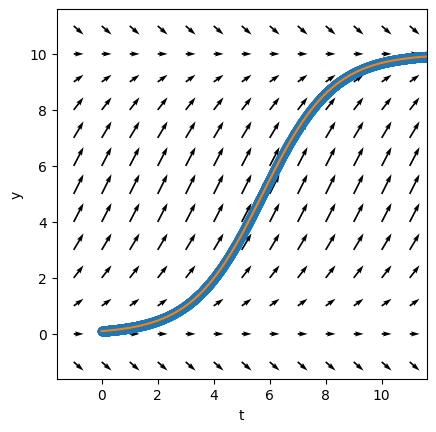

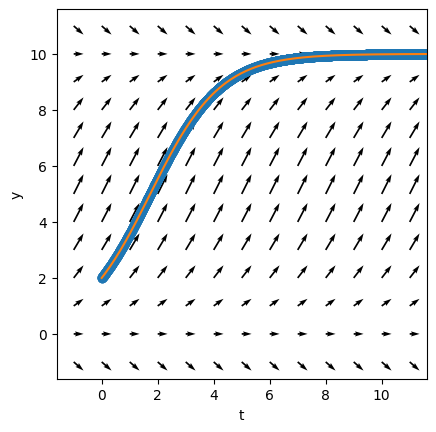

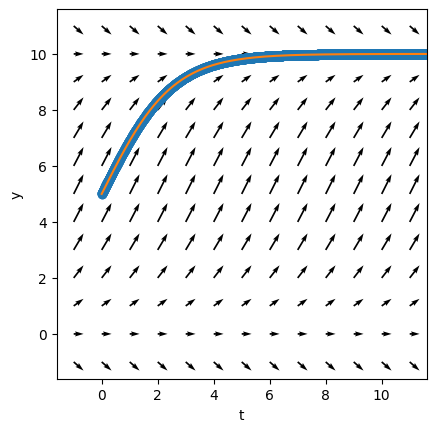

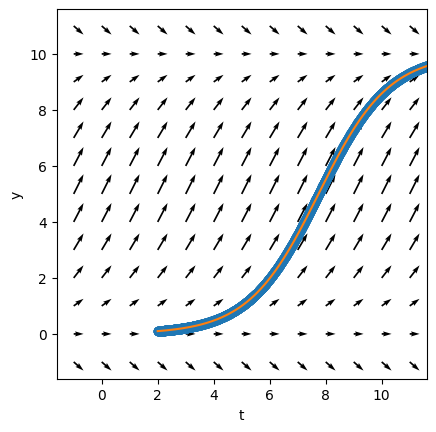

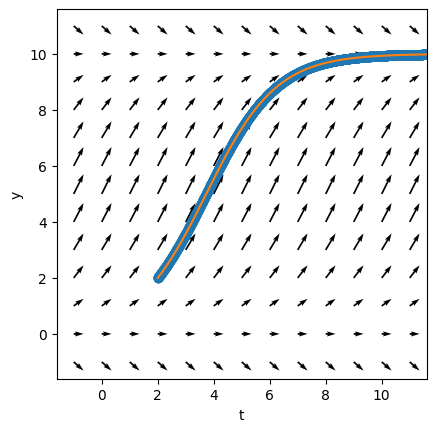

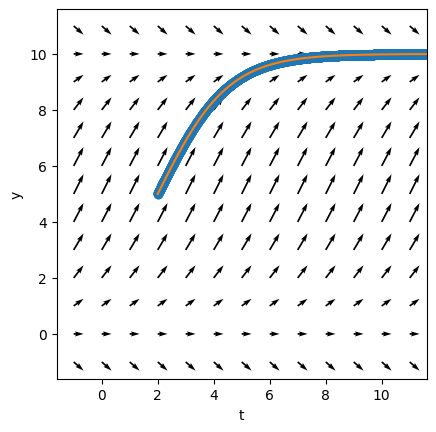

In [1]:
from ipynb.fs.full.numlogistic import SimulateLogisticGrowth
from ipynb.fs.full.numode import EulerStep

In [2]:
def EulerStep(f, t, y, dt):
    return y + dt * f(t,y)

def HeunStep(f, t, y, dt):
    y12 = y + 0.5 * dt * f(t, y)
    return y + dt * f(t+0.5*dt,y12)


start time = 0, start value = 0.1
expliziter Euler


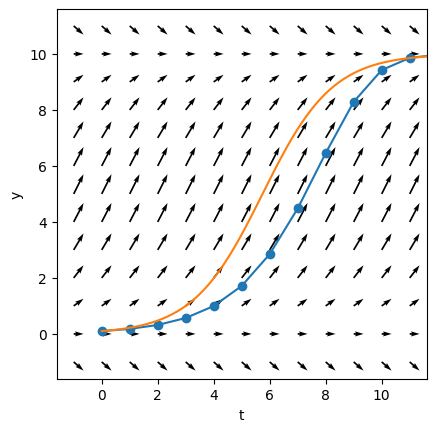

Heun


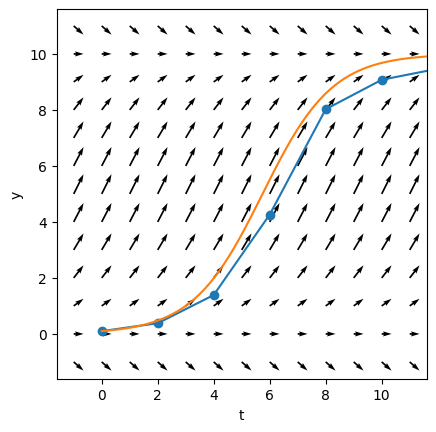

start time = 0, start value = 2
expliziter Euler


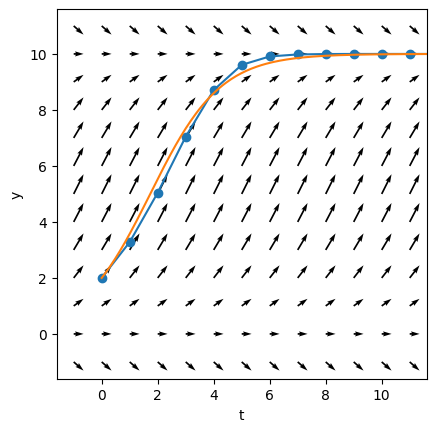

Heun


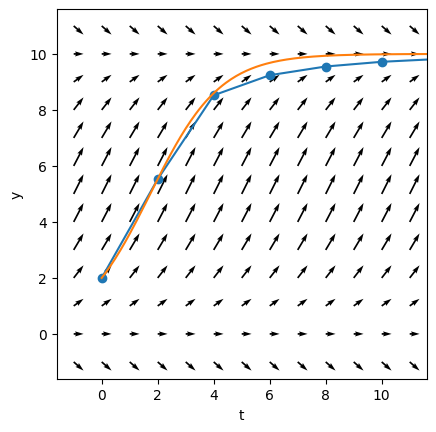

start time = 0, start value = 5
expliziter Euler


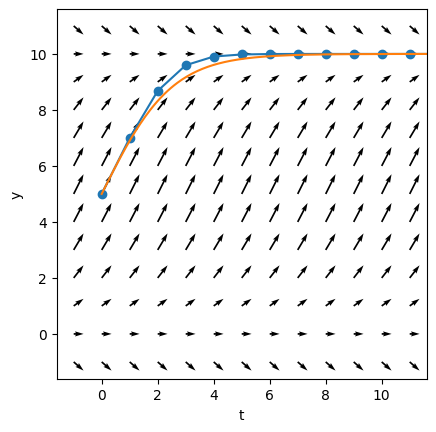

Heun


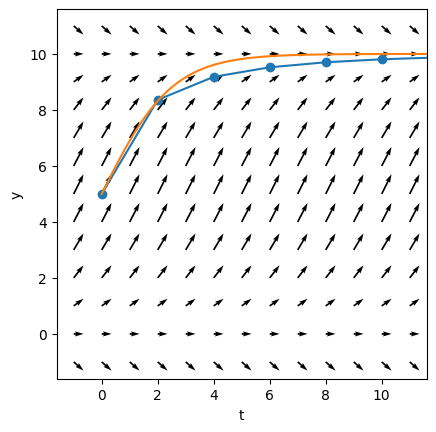

start time = 2, start value = 0.1
expliziter Euler


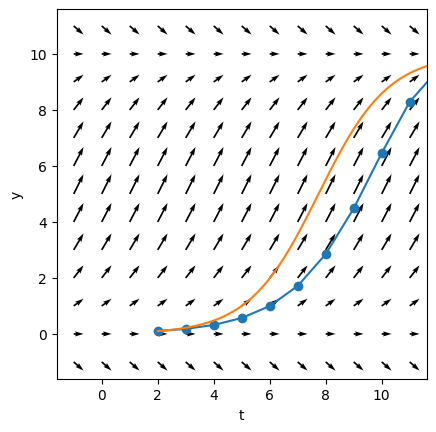

Heun


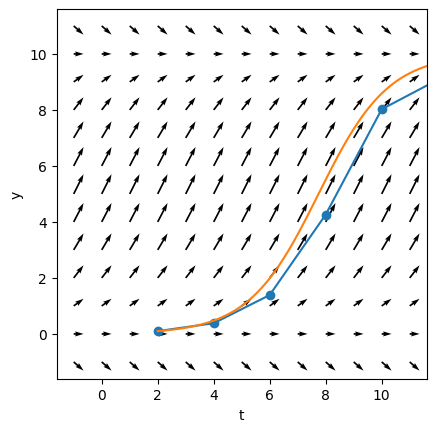

start time = 2, start value = 2
expliziter Euler


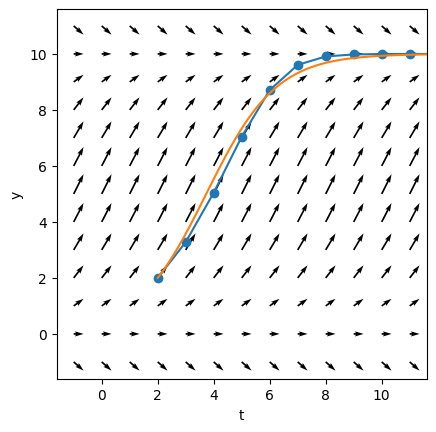

Heun


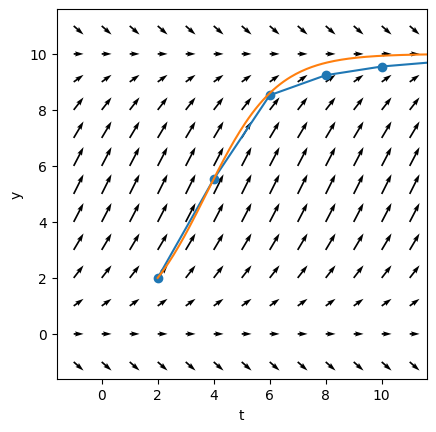

start time = 2, start value = 5
expliziter Euler


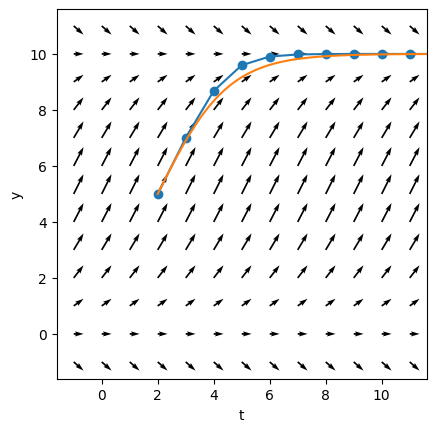

Heun


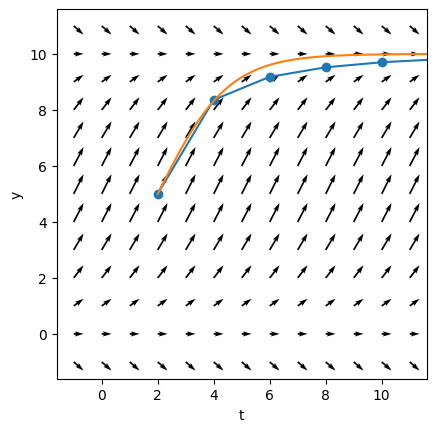

In [3]:
for start_t in [0,2]:
    for start_y0 in [0.1,2,5]:
        print(f"start time = {start_t}, start value = {start_y0}")
        print("expliziter Euler")
        SimulateLogisticGrowth(method=EulerStep, start_t=start_t, start_y0=start_y0, dt=1)        
        print("Heun")
        SimulateLogisticGrowth(method=HeunStep, start_t=start_t, start_y0=start_y0, dt=2)

Nächste Herausforderung:

* Differentialgleichungen mit vektoriellen Funktionen $y(t) \in \mathbb{R}^d$
* $\leadsto$ [SIR-Modell](SIR.ipynb)